# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Section 1: Project Definition

## Project Overview

This project analyzes simulated data that represents customer behavior on the Starbucks rewards mobile app. Starbucks periodically sends out offers to app users, which can be advertisements or actual offers like discounts or buy one get one free (BOGO) deals. The challenge is to determine which demographic groups respond best to different offer types.

The data includes transactional, demographic, and offer information. Each offer has a validity period, and the data also tracks when users view and complete offers. The goal is to combine this data and identify the demographic groups that have the highest response rates to specific offer types.

By understanding customer behavior and preferences, Starbucks can personalize offers and improve the effectiveness of their mobile app marketing campaigns. 

And through that, I will try to find out how well Starbucks customers use the current management application and incentive system. And from there, propose which customers will need more attention through their needs and behaviors from data taken from app users.

## Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

## Problem Statement

The problem here is that not too many customers are really interested in Starbucks promotions. If you continue to follow the path of offering current incentives to customers, you will miss out on potential customers. 
* So the problem here is to focus and find those incentives on those who really need the incentives and on potential customers as well as familiar customers. 
* From there, we suggest taking care of potential customers to increase revenue and attract more customers in the future

## Metrics


To be able to draw final conclusions and data, I plan to clean the data, then perform univariate and multivariate analyzes with visualize to filter out a group of potential customers. 
* During the analysis and visualization process, we will use images, percentage comparison parameters about the differences between customer groups, and the difference in quantity to make personal predictions. Solve the problem of proposing potential customer care to increase revenue and attract more customers in the future
* And after having a completely analyzed data set, I will feed that data set into different machine learning models, and then compare the results, drawing the best results based on accuracy. Accuracy is a commonly used evaluation measure in machine learning, especially for classification problems. It measures the ratio of correctly predicted cases to the total number of cases in the data set. In the context of the problem I gave earlier, using accuracy as a metric makes sense because I want to evaluate whether my machine learning model can accurately predict the type of offer that can be given to the right type of offer. customers need it. And in my case, I think accuracy is enough because the reviewed data set looks quite balanced.

In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier


In [3]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Section 2: Analysis

## Data Exploration & Visualization

### portfolio dataset

Contains offers sent during 30-day test period (10 offers x 6 fields)

* reward: (numeric) money awarded for the amount spent
* channels: (list) web, email, mobile, social
* difficulty: (numeric) money required to be spent to receive reward
* duration: (numeric) time for offer to be open, in days
* offer_type: (string) bogo, discount, informational
* id: (string/hash)

In [4]:
portfolio.shape

(10, 6)

In [5]:
portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [6]:
portfolio.tail(5)

,reward,channels,difficulty,duration,offer_type,id
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [7]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [8]:
portfolio['id'].nunique()

10

In [9]:
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

In [10]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


### profile dataset

Contains rewards program users (17000 users x 5 fields)

* gender: (categorical) M, F, O, or null
* age: (numeric) missing value encoded as 118
* id: (string/hash)
* became_member_on: (date) format YYYYMMDD
* income: (numeric)

In [11]:
profile.shape

(17000, 5)

In [12]:
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [13]:
profile.tail(5)

,gender,age,id,became_member_on,income
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0
16999,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0


In [14]:
profile.isnull().sum()


gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [15]:
(profile['gender'].isnull() & profile['income'].isnull()).sum()

2175

In [16]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


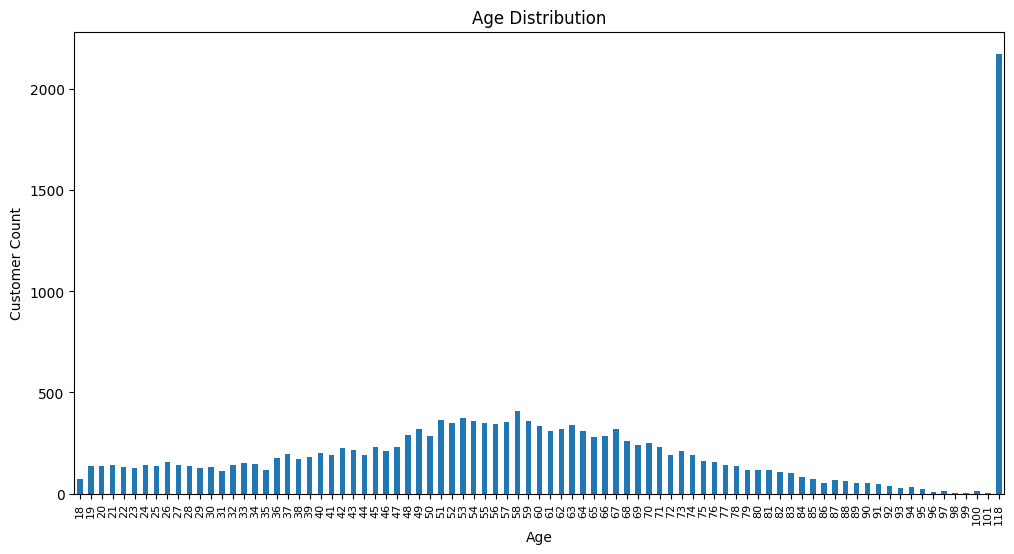

In [17]:
#check distribution of age column
plt.figure(figsize=(12, 6))
profile['age'].value_counts().sort_index().plot.bar()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.xticks(fontsize=8)
plt.show()

In [18]:
profile['age'].nlargest(10)

0     118
2     118
4     118
6     118
7     118
9     118
10    118
11    118
17    118
23    118
Name: age, dtype: int64

In [19]:
profile[profile['age']==118].count()

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

In [20]:
profile[profile['age']==118].head(10)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
9,None,118,8974fc5686fe429db53ddde067b88302,20161122,NaN
10,None,118,c4863c7985cf408faee930f111475da3,20170824,NaN
11,None,118,148adfcaa27d485b82f323aaaad036bd,20150919,NaN
17,None,118,744d603ef08c4f33af5a61c8c7628d1c,20170801,NaN
23,None,118,2b826eba31074a059d63b0ae8f50b7d5,20170907,NaN


**Customers who has age equals to 118 doesn't have gender and income in the dataset**

<Axes: >

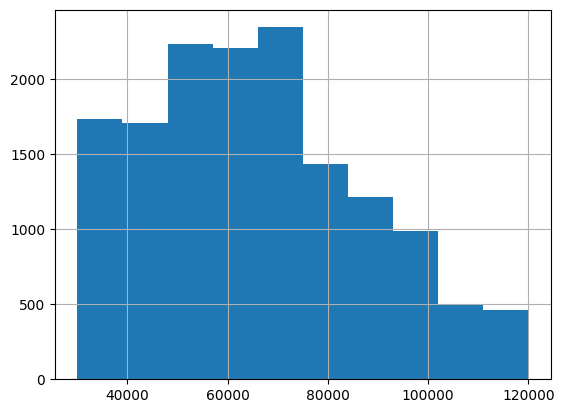

In [21]:
profile['income'].hist()


In [22]:
profile['age'].nsmallest(10)

116     18
156     18
500     18
659     18
750     18
1272    18
1852    18
2102    18
2209    18
2270    18
Name: age, dtype: int64

<Axes: >

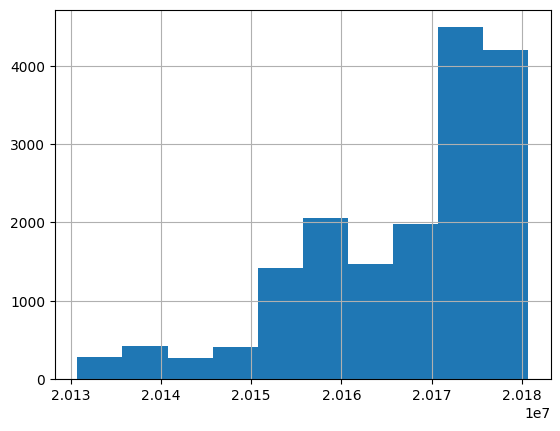

In [23]:
profile['became_member_on'].hist()

In [24]:
profile.groupby(['gender'])['gender'].count()

gender
F    6129
M    8484
O     212
Name: gender, dtype: int64

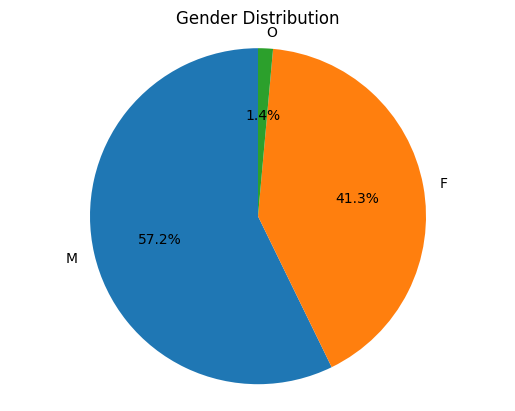

In [25]:
# Assuming your dataframe is named 'profile'
gender_counts = profile['gender'].value_counts()

# Create a circle plot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.title('Gender Distribution')
plt.show()

### transcript dataset

Event log (306648 events x 4 fields)

* person: (string/hash)
* event: (string) offer received, offer viewed, transaction, offer completed
* value: (dictionary) different values depending on event type
* offer id: (string/hash) not associated with any "transaction"
* amount: (numeric) money spent in "transaction"
* reward: (numeric) money gained from "offer completed"
* time: (numeric) hours after start of test

In [26]:
transcript.shape


(306534, 4)

In [27]:
transcript.head(5)


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [28]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [29]:
# Assuming your dataframe is named 'transcript'
for column in transcript.columns:
    if (column != 'value'):
        n_unique = transcript[column].nunique()
        print(f"Number of unique values in column '{column}': {n_unique}")

Number of unique values in column 'person': 17000
Number of unique values in column 'event': 4
Number of unique values in column 'time': 120


In [30]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [31]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [32]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


# Section 3: Methodology

## Data Preprocessing

### portfolio dataset

**I noticed that values in 'channels' can be extracted to separated columns for a chance to analysis**

In [33]:
unique_channels = set()

# Iterate over each row in the 'channels' column
for channels_list in portfolio['channels']:
    unique_channels.update(channels_list)

unique_channels = list(unique_channels)
unique_channels

['web', 'mobile', 'social', 'email']

In [34]:
# Create the columns with initial values set to 0
for channel in unique_channels:
    portfolio[channel] = 0

# Count the occurrences of each channel in each row
for index, row in portfolio.iterrows():
    for channel in row['channels']:
        portfolio.at[index, channel] += 1

In [35]:
portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id,web,mobile,social,email
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [36]:
portfolio.drop('channels', axis = 1, inplace=True)
portfolio

,reward,difficulty,duration,offer_type,id,web,mobile,social,email
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [37]:
portfolio.describe()

,reward,difficulty,duration,web,mobile,social,email
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,4.200000,7.700000,6.500000,0.800000,0.900000,0.600000,1.0
std,3.583915,5.831905,2.321398,0.421637,0.316228,0.516398,0.0
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.0
25%,2.000000,5.000000,5.000000,1.000000,1.000000,0.000000,1.0
50%,4.000000,8.500000,7.000000,1.000000,1.000000,1.000000,1.0
75%,5.000000,10.000000,7.000000,1.000000,1.000000,1.000000,1.0
max,10.000000,20.000000,10.000000,1.000000,1.000000,1.000000,1.0


###  profile dataset

**In profile dataset, there're a lot of Null values around in the dataset, so I start to replace it**

In [38]:
profile['age'] = profile['age'].astype(int)
profile['gender'] = profile['gender'].fillna('Unknown')
profile['income'] = profile['income'].astype(float)
profile.head(10)

,gender,age,id,became_member_on,income
0,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,Unknown,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,Unknown,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
6,Unknown,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,Unknown,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
9,Unknown,118,8974fc5686fe429db53ddde067b88302,20161122,NaN


In [39]:
profile['income'] = profile['income'].fillna(profile['income'].mean())

In [40]:
profile['became_member_on'] = profile['became_member_on'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y-%m-%d')

# Create new columns for year, month, and day
# profile['became_member_on_year'] = profile['became_member_on'].dt.year
# profile['became_member_on_month'] = profile['became_member_on'].dt.month
# profile['became_member_on_day'] = profile['became_member_on'].dt.day

In [41]:
profile

,gender,age,id,became_member_on,income
0,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.000000
2,Unknown,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,65404.991568
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.000000
4,Unknown,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,65404.991568
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.000000
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.000000
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.000000
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.000000


### transcript dataset

**In transcript dataset, clearly notice that in 'value' column, they're in dictionary type, so I need to extract it for later analysis**

In [42]:
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


Not only 'offer_id' found but there're other left

In [43]:
value_keys = []
for index, row in transcript.iterrows():
    for key in row['value']:
        if key in value_keys:
            continue
        else:
            value_keys.append(key)

value_keys

['offer id', 'amount', 'offer_id', 'reward']

In [44]:
# Create empty columns
transcript['offer_id'] = ''
transcript['amount'] = 0
transcript['reward'] = 0

# Iterate over each row
for index, row in transcript.iterrows():
    # Check if 'offer id' or 'offer_id' key is present
    if 'offer id' in row['value']:
        transcript.at[index, 'offer_id'] = row['value']['offer id']
    elif 'offer_id' in row['value']:
        transcript.at[index, 'offer_id'] = row['value']['offer_id']
    
    # Check if 'amount' key is present
    if 'amount' in row['value']:
        transcript.at[index, 'amount'] = row['value']['amount']
    
    # Check if 'reward' key is present
    if 'reward' in row['value']:
        transcript.at[index, 'reward'] = row['value']['reward']
        
transcript['amount'] = transcript['amount'].astype(int)

In [45]:
transcript = transcript.drop('value', axis=1)
transcript.head(5)

,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0


In [46]:
transcript.isnull().sum()

person      0
event       0
time        0
offer_id    0
amount      0
reward      0
dtype: int64

And after cleaned data, I need to analysis the data to find which groups of people are most responsive to each type of offer, and how best to present each type of offer

## Analysis cleaned data

**Univariate**
1. In each dataframe, analyze the values ​​that appear commonly in each column.
2. Analyze the age and income of customers using Starbucks services
3. Get the top 5 customers with the highest purchasing history
4. Promotions which used frequently/infrequently in the Starbucks system
5. Which event is most celebrated in transcripts?

**Multivariate** 
1. Analyze customer income by age group
2. Analyze customer income by gender
3. Analyze customer income by gender in each age group
4. Analyze promotion usage frequency by age group
5. Gender distribution of customers buying products?
6. Analyzing customer groups takes a lot of effort and time to achieve promotion limits (Based on gender, age)
7. Analyze customers' frequency of purchases (based on 2 continuous transcripts)
8. Statistics on the number of customers increasing monthly - quarterly


### Univariate:

#### 1. In each dataframe, analyze the values ​​that appear commonly in each column.

profile dataset

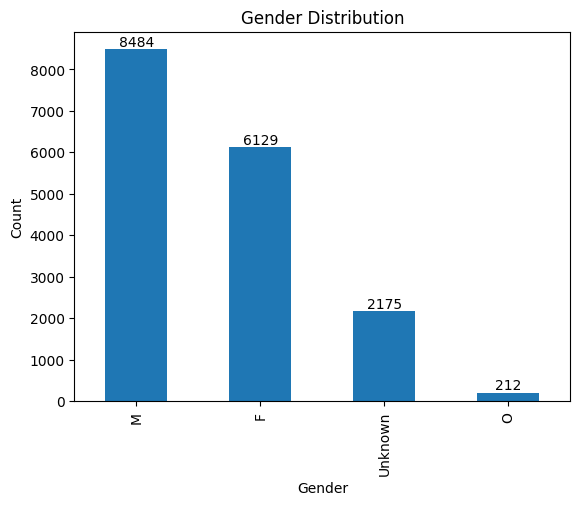

In [47]:
# Plot the 'gender' column in a bar chart
profile['gender'].value_counts().plot(kind='bar')
gender_counts = profile['gender'].value_counts()
# Add the values on each bar
for i, v in enumerate(gender_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Set the title and labels for the chart
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

**Based on the chart above, Male customer will account for a larger proportion of customers using services from Starbucks than Female customer**

In [48]:
profile['age'].value_counts().shape[0]

85

In [49]:
# 1. In each dataframe, analyze the values ​​that appear commonly in each column.
age_ranges = [0, 12, 18, 22, 64, 119]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Elder']

# Create a new column 'age_group' based on the 'age' column
profile['age_group'] = pd.cut(profile['age'], bins=age_ranges, labels=age_labels)


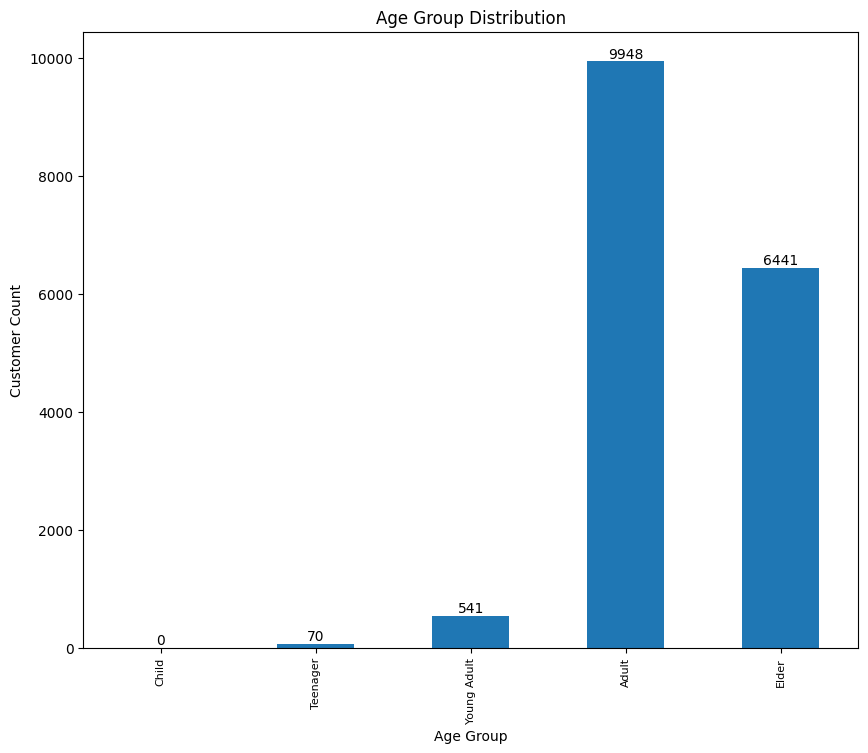

In [50]:
plt.figure(figsize=(10, 8))
profile['age_group'].value_counts().sort_index().plot.bar()
# Count the number of occurrences for each age group
age_group_counts = profile['age_group'].value_counts().sort_index()
# Add the values on each bar
for i, v in enumerate(age_group_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.xticks(fontsize=8)
plt.show()

**After separated the age to age group and show the statistic on the chart above. I found that almost Starbucks customers came from Adult, and just a small number of Teenager care about those drinks. I think those such low figures are due to the fact that teenagers often do not have enough money to pay for expensive drinks. So I will figure out later**

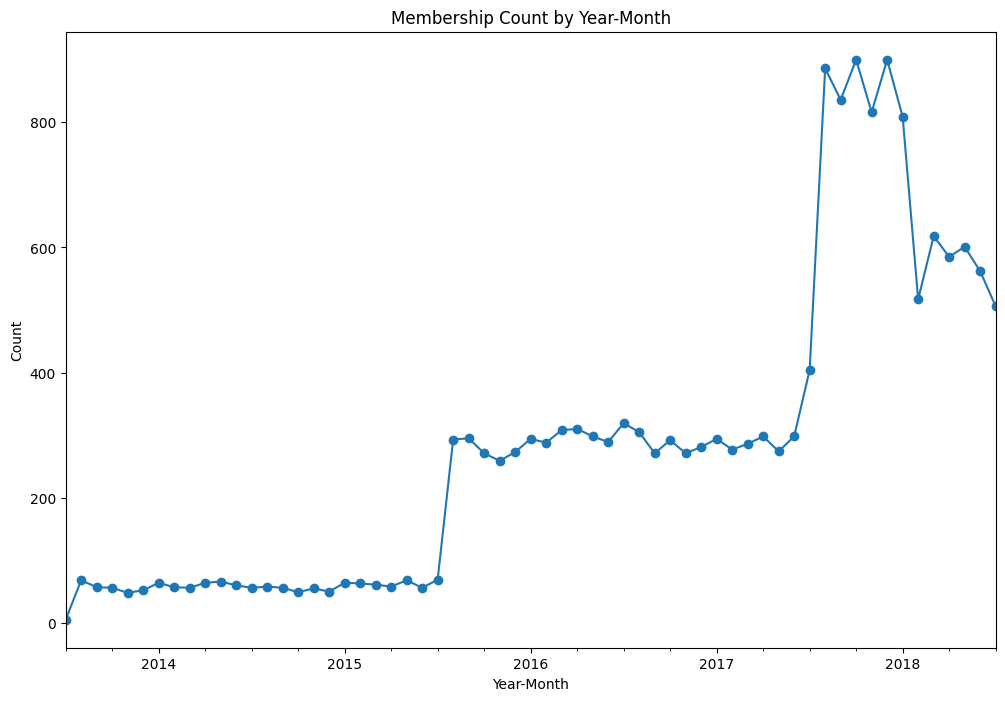

In [51]:
plt.figure(figsize=(12, 8))
# Create a new column 'membership_date' with year and month
profile['became_member_on_month'] = profile['became_member_on'].dt.to_period('M')

# Group by 'membership_date' and count the occurrences
became_member_on_month_count = profile['became_member_on_month'].value_counts().sort_index()

# Plot the 'became_member_on_month_count' data as a line chart
became_member_on_month_count.plot.line(marker='o')

# Set the title and labels for the chart
plt.title('Membership Count by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')

# Show the plot
plt.show()

**Base on the chart above, there are some increase of customers in the middle of 2017 till the end of 2017. And the number of customers decrease at the start of 2018.**

transcript dataset

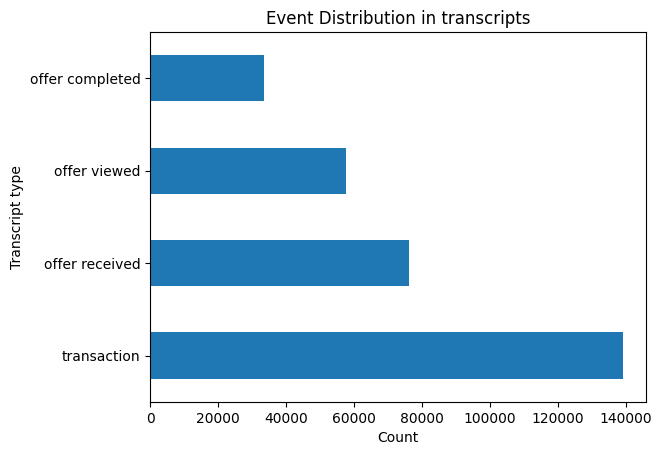

In [52]:
# Plot the 'event' column in a bar chart
transcript['event'].value_counts().plot(kind='barh')

# Set the title and labels for the chart
plt.title('Event Distribution in transcripts')
plt.xlabel('Count')
plt.ylabel('Transcript type')

# Show the plot
plt.show()

**Between transaction data, we get data about offer received. We can see that almost 70-78% of offers will be seen by customers and customers will use 50-55% of those viewed offers.**

portfolio dataset

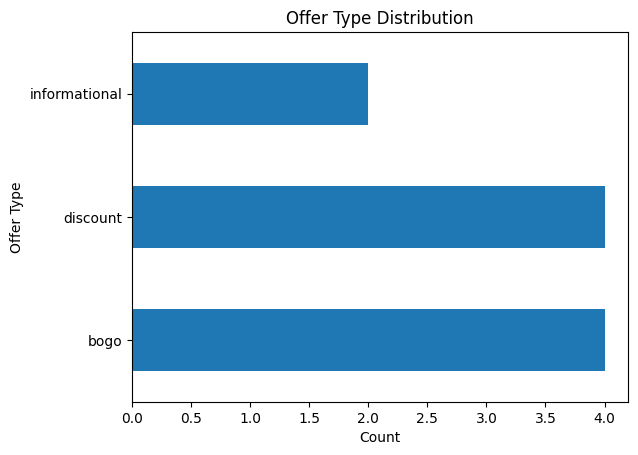

In [53]:
portfolio['offer_type'].value_counts().plot(kind='barh')

# Set the title and labels for the chart
plt.title('Offer Type Distribution')
plt.xlabel('Count')
plt.ylabel('Offer Type')

# Show the plot
plt.show()

**The number of BOGO offer and discount offers doesn't different much. They almost the same**

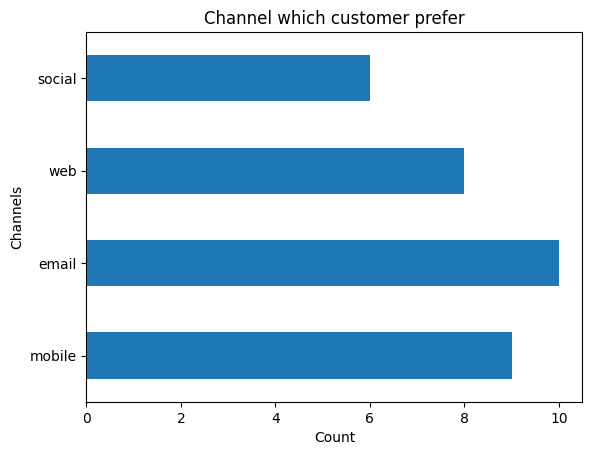

In [54]:
# Plot the columns 'mobile', 'email', 'web', and 'social' in a bar chart
portfolio[['mobile', 'email', 'web', 'social']].sum().plot(kind='barh')

# Set the title and labels for the chart
plt.title('Channel which customer prefer')
plt.xlabel('Count')
plt.ylabel('Channels')

# Show the plot
plt.show()

**Almost offer was sent to customer email, and least of them was shown on social**

#### 2. Analyze the age and income of customers using Starbucks services

In [55]:
customer_age_describe = profile['age'].describe()
customer_age_describe['mean']

62.53141176470588

In [56]:
customer_income_describe = profile['income'].describe()
customer_income_describe['mean']

65404.9915682968

**We can see that the average age of Starbucks users is ~63 years old and the income level is ~65k$**

#### 3. Get the top 5 customers with the highest purchasing history

In [57]:
# 3. Get the top 5 customers with the highest purchasing history
loyal_customer_count = transcript[(transcript['event'].isin(['offer completed', 'transaction']))].groupby(['person', 'event'])['amount'].sum().reset_index().nlargest(5, 'amount')
loyal_customer_count


,person,event,amount
6956,3c8d541112a74af99e88abbd0692f00e,transaction,1606
27773,f1d65ae63f174b8f80fa063adcaa63b7,transaction,1360
20207,ae6f43089b674728a50b8727252d3305,transaction,1320
11265,626df8678e2a4953b9098246418c9cfa,transaction,1314
13252,73afdeca19e349b98f09e928644610f8,transaction,1314


In [58]:
customer_most_purchasing = pd.merge(loyal_customer_count, transcript, on='person')
customer_purchase_count = customer_most_purchasing[customer_most_purchasing['event_y'] == 'offer completed'].groupby('person').count()[['event_y']]
top_5_customer_highest_purchasing = pd.merge(customer_purchase_count, loyal_customer_count, on='person').sort_values('amount', ascending=False).rename(columns={'event_y': 'completed_offers_count'})
top_5_customer_highest_purchasing

,person,completed_offers_count,event,amount
0,3c8d541112a74af99e88abbd0692f00e,5,transaction,1606
4,f1d65ae63f174b8f80fa063adcaa63b7,6,transaction,1360
3,ae6f43089b674728a50b8727252d3305,3,transaction,1320
1,626df8678e2a4953b9098246418c9cfa,4,transaction,1314
2,73afdeca19e349b98f09e928644610f8,5,transaction,1314


In [59]:
pd.merge(profile, top_5_customer_highest_purchasing, left_on='id', right_on='person')

,gender,age,id,became_member_on,income,age_group,became_member_on_month,person,completed_offers_count,event,amount
0,M,50,73afdeca19e349b98f09e928644610f8,2016-05-12,86000.0,Adult,2016-05,73afdeca19e349b98f09e928644610f8,5,transaction,1314
1,M,53,626df8678e2a4953b9098246418c9cfa,2015-08-25,103000.0,Adult,2015-08,626df8678e2a4953b9098246418c9cfa,4,transaction,1314
2,F,36,ae6f43089b674728a50b8727252d3305,2017-05-21,71000.0,Adult,2017-05,ae6f43089b674728a50b8727252d3305,3,transaction,1320
3,M,32,f1d65ae63f174b8f80fa063adcaa63b7,2018-06-19,64000.0,Adult,2018-06,f1d65ae63f174b8f80fa063adcaa63b7,6,transaction,1360
4,M,77,3c8d541112a74af99e88abbd0692f00e,2017-09-26,97000.0,Elder,2017-09,3c8d541112a74af99e88abbd0692f00e,5,transaction,1606


**Regarding the common point of these customers, we can see that the majority will be men of adult age, with an above average income of $65k as we statistics just now. This can be good information for future analysis**

#### 4. Promotions which used frequently/infrequently in the Starbucks system and the types of them

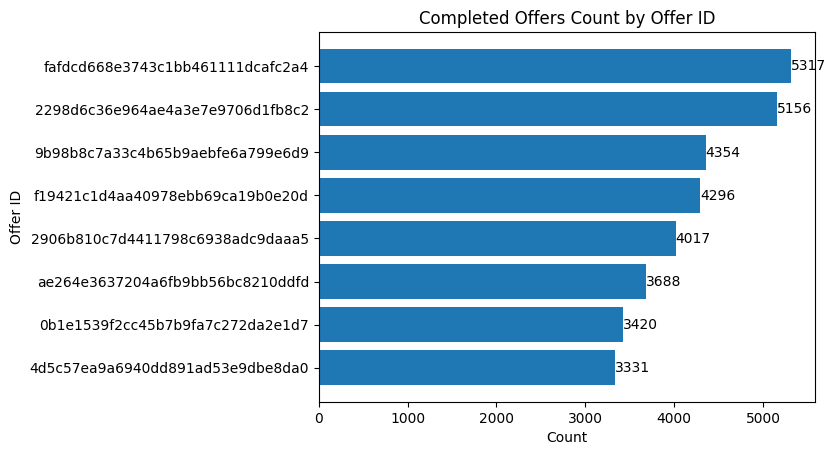

In [60]:
# 4. Promotions appear frequently/infrequently in the Starbucks system
df_offer_completed = transcript[transcript['event'] == 'offer completed']

offer_counts = df_offer_completed['offer_id'].value_counts().sort_values()
plt.barh(offer_counts.index, offer_counts.values)
plt.xlabel('Count')
plt.ylabel('Offer ID')
plt.title('Completed Offers Count by Offer ID')

# Add value labels to each bar
for i, v in enumerate(offer_counts.values):
    plt.text(v, i, str(v), color='black', va='center')

plt.show()

In [61]:
print(f'Promotions which used frequently is {offer_counts.index[-1]} with used {offer_counts.values[-1]} times')

Promotions which used frequently is fafdcd668e3743c1bb461111dcafc2a4 with used 5317 times


In [62]:
portfolio[portfolio['id'] == 'fafdcd668e3743c1bb461111dcafc2a4']

,reward,difficulty,duration,offer_type,id,web,mobile,social,email
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1


In [63]:
print(f'Promotions which used unfrequently is {offer_counts.index[0]} with used {offer_counts.values[0]} times')

Promotions which used unfrequently is 4d5c57ea9a6940dd891ad53e9dbe8da0 with used 3331 times


In [64]:
portfolio[portfolio['id'] == '4d5c57ea9a6940dd891ad53e9dbe8da0']

,reward,difficulty,duration,offer_type,id,web,mobile,social,email
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1


In [65]:
transcript['types_of_offer']  = transcript.apply(lambda x: portfolio[portfolio['id'] == x['offer_id']]['offer_type'].values[0] if len(portfolio[portfolio['id'] == x['offer_id']]) > 0 else 'Unknown', axis=1)

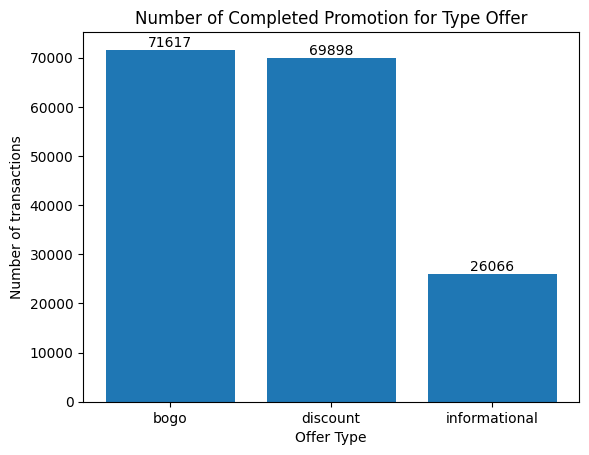

In [66]:
filtered_transcript = transcript[transcript['types_of_offer'] != 'Unknown']

# Get the count for each offer_type
offer_type_counts = filtered_transcript['types_of_offer'].value_counts()

# Plot the countplot using plt
plt.bar(offer_type_counts.index, offer_type_counts.values)
plt.title('Number of Completed Promotion for Type Offer')
plt.ylabel('Number of transactions')
plt.xlabel('Offer Type')
plt.xticks(rotation=0)
for i, count in enumerate(offer_type_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

**We can see through the analysis above that the offer type that we should pay less attention to is 'informational' because it seems that customers do not pay too much attention to this type of offer. And number of completed promotion for 'bogo' and 'discount' doesn't different much**

#### 5. Which event is most celebrated in transcripts?

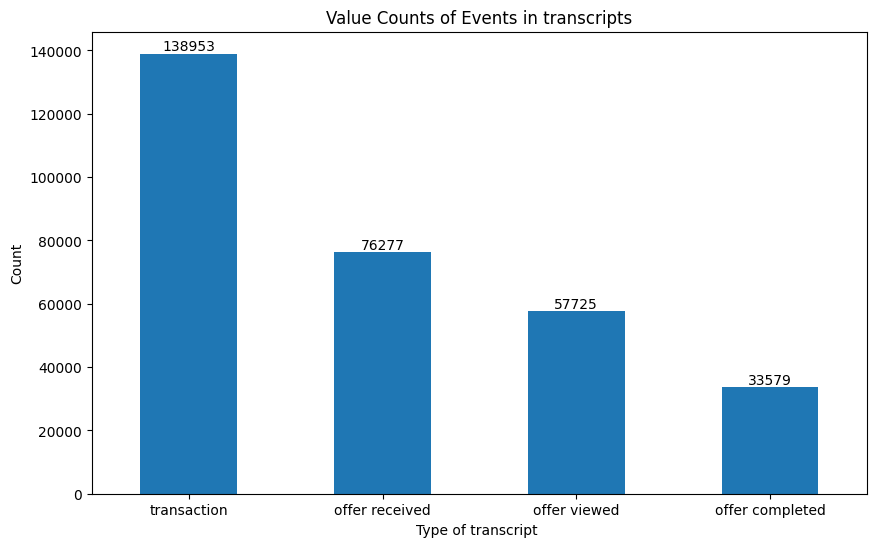

In [67]:
event_counts = transcript['event'].value_counts()

# Plotting the value counts
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.xlabel('Type of transcript ')
plt.ylabel('Count')
plt.title('Value Counts of Events in transcripts')
plt.xticks(rotation=0)
for i, count in enumerate(event_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [68]:
transcript['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

**trascation have the biggest amount number of rows in the transcript dataframe with ~140k**

### Multivariate

#### 1. Analyze customer income by age group

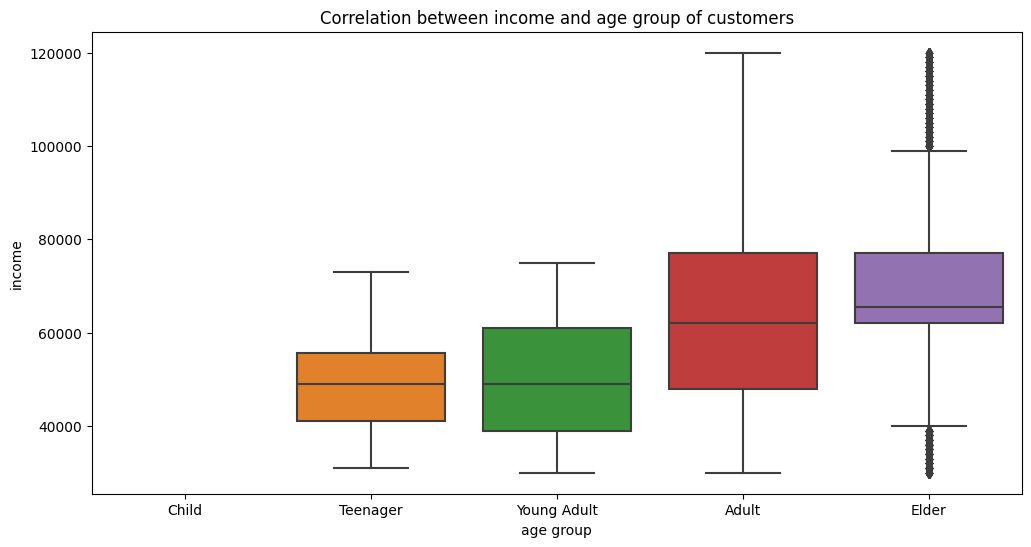

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=profile['age_group'], y=profile['income'])
plt.title('Correlation between income and age group of customers')
plt.ylabel('income')
plt.xlabel('age group')
plt.show()

**According to the above analysis that has been predicted, we can see through this chart that the older the customer is, the more their income will increase according to the median, however there will still be a The number of adults has a larger income than those later in life. Represents the diversity of data**

#### 2. Analyze customer income by gender

In [70]:
profile

,gender,age,id,became_member_on,income,age_group,became_member_on_month
0,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568,Elder,2017-02
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.000000,Adult,2017-07
2,Unknown,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,65404.991568,Elder,2018-07
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.000000,Elder,2017-05
4,Unknown,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,65404.991568,Elder,2017-08
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.000000,Adult,2018-06
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.000000,Adult,2018-07
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.000000,Adult,2017-01
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.000000,Elder,2016-03


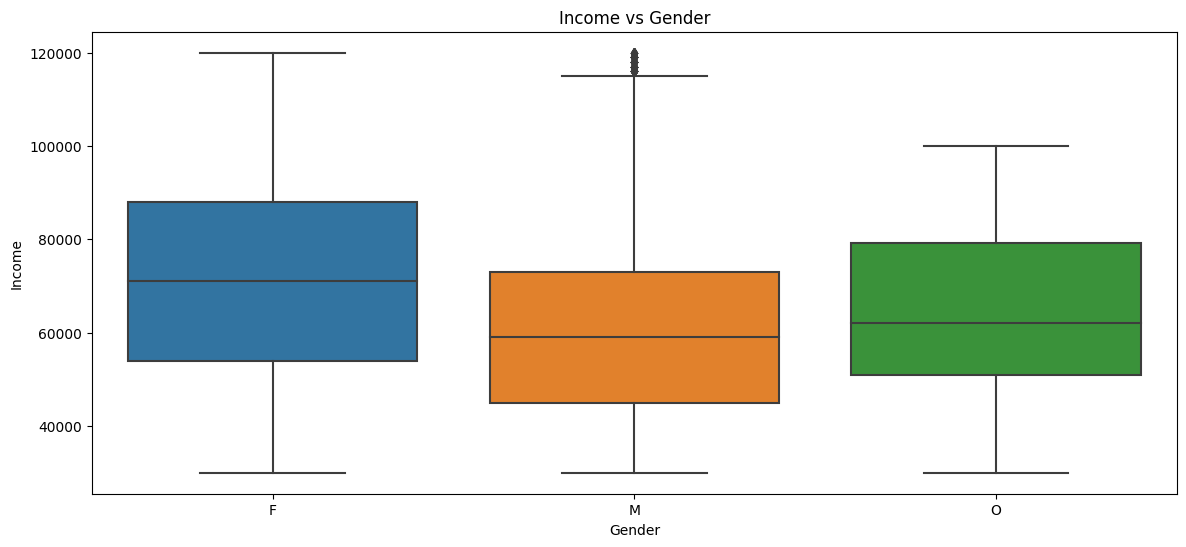

In [71]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=profile[profile['gender'] != 'Unknown']['gender'], y=profile['income'])
plt.title('Income vs Gender')
plt.ylabel('Income')
plt.xlabel('Gender')
plt.show()

**If we do not consider others, we can see from the chart that Female's income will be higher than Male's in terms of range, but even in terms of medium or income range, it is slightly better.**

#### 3. Analyze customer income by gender in each age group

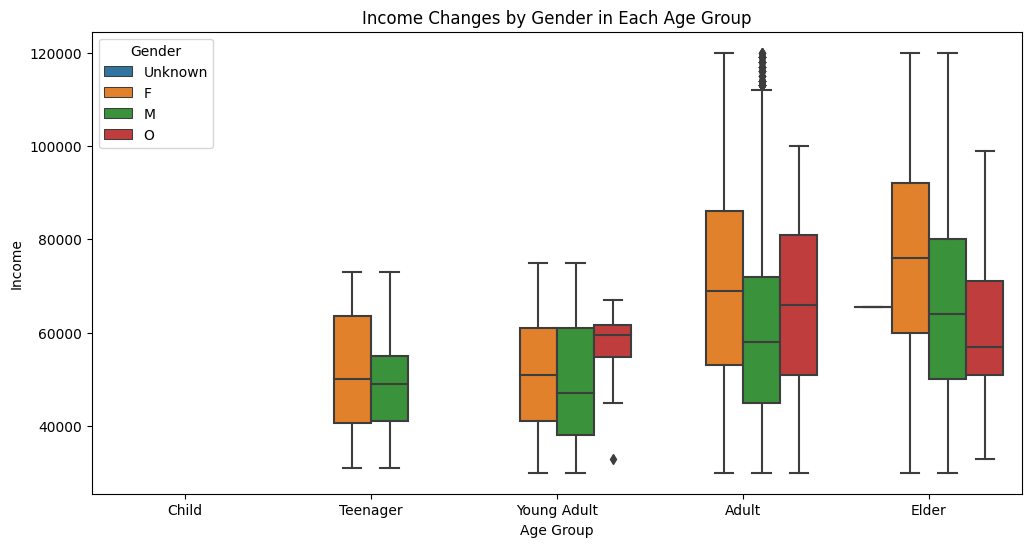

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=profile['age_group'], y=profile['income'], hue=profile['gender'])
plt.title('Income Changes by Gender in Each Age Group')
plt.ylabel('Income')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.show()

**Through the chart above, we can further confirm that the female customer group will have more potential to use the service when their income is more abundant than male customers. That difference becomes larger as age increases.**

#### 4. Analyze promotion usage frequency by age group

In [73]:
# 1. Analyze customer income by age
transcript = transcript.merge(profile[['id', 'age_group']], left_on='person', right_on='id', how='left')

# Drop the 'id' column from the merged dataframe
transcript.drop('id', axis=1, inplace=True)

In [74]:
transcript['types_of_offer']

0             bogo
1         discount
2         discount
3         discount
4             bogo
            ...   
306529     Unknown
306530     Unknown
306531     Unknown
306532     Unknown
306533     Unknown
Name: types_of_offer, Length: 306534, dtype: object

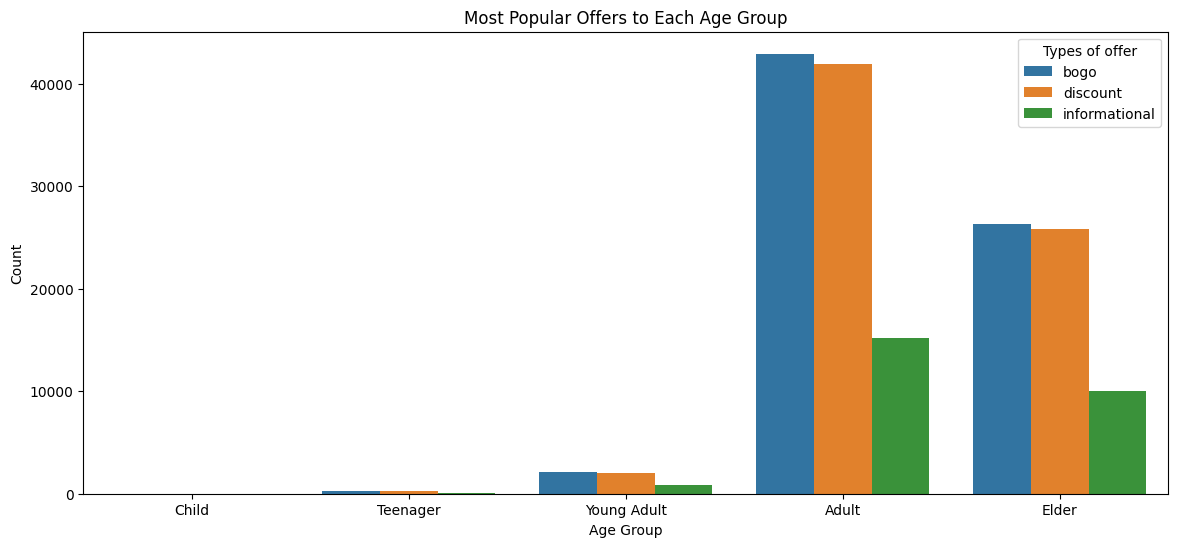

In [75]:
plt.figure(figsize=(14, 6))
sns.countplot(x="age_group", hue="types_of_offer", data=transcript[transcript['types_of_offer'] != 'Unknown'])
plt.title('Most Popular Offers to Each Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Types of offer')
plt.show()

**Through the chart above, first of all, we do not see the presence of Teenager and Child, probably because these two groups rarely use Starbucks and are not too interested in offers. Next, Young Adult has increased but not significantly. . And most offers will be for mature and elder customers.In Adult, the number of offers used is quite large, much higher than other groups.**

#### 5. Gender distribution of customers buying products?


In [76]:
transcript = transcript.merge(profile[['id', 'gender']], left_on='person', right_on='id', how='left')
transcript

,person,event,time,offer_id,amount,reward,types_of_offer,age_group,id,gender
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,Elder,78afa995795e4d85b5d9ceeca43f5fef,F
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,Elder,a03223e636434f42ac4c3df47e8bac43,Unknown
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,discount,Elder,e2127556f4f64592b11af22de27a7932,M
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,discount,Elder,8ec6ce2a7e7949b1bf142def7d0e0586,Unknown
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo,Elder,68617ca6246f4fbc85e91a2a49552598,Unknown
...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,,1,0,Unknown,Elder,b3a1272bc9904337b331bf348c3e8c17,M
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,,9,0,Unknown,Adult,68213b08d99a4ae1b0dcb72aebd9aa35,M
306531,a00058cf10334a308c68e7631c529907,transaction,714,,3,0,Unknown,Adult,a00058cf10334a308c68e7631c529907,F
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,,3,0,Unknown,Adult,76ddbd6576844afe811f1a3c0fbb5bec,M


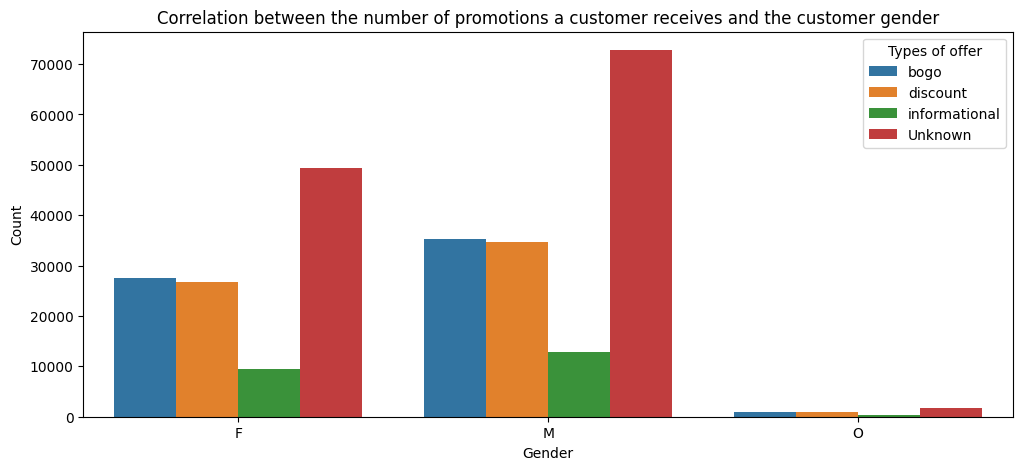

In [77]:
transcript_gender_not_unknown = transcript[transcript['gender'] != 'Unknown']
plt.figure(figsize=(12, 5))
sns.countplot(x=transcript_gender_not_unknown['gender'], hue='types_of_offer', data=transcript)
plt.title('Correlation between the number of promotions a customer receives and the customer gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Types of offer')
plt.show()

**Through the chart, we can see that male customers receive more offers than female customers. And the distribution of received rates looks similar based on the total offers received by each side.**

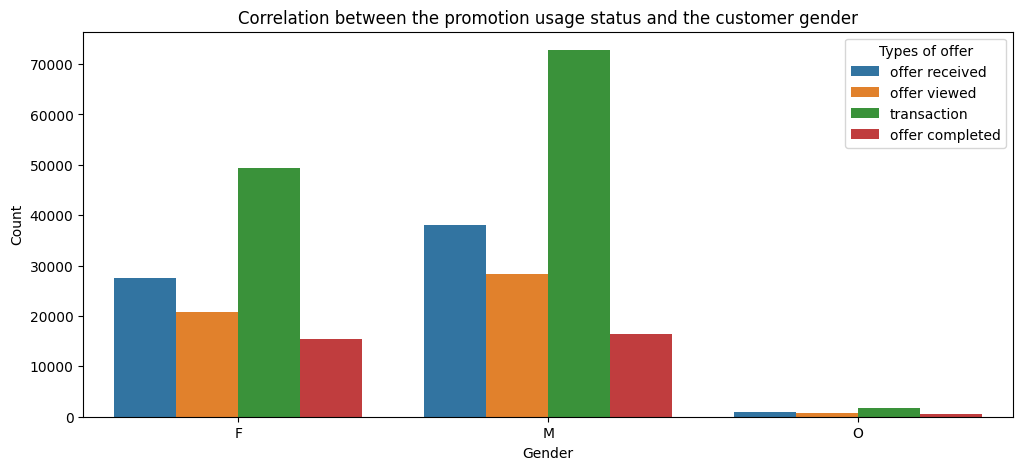

In [78]:
plt.figure(figsize=(12, 5))
sns.countplot(x=transcript_gender_not_unknown['gender'], hue='event', data=transcript)
plt.title('Correlation between the promotion usage status and the customer gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Types of offer')
plt.show()

**Earlier we had a general analysis that when customers receive an offer, about 70-75% of customers will view that offer and 50-55% will complete the offer. Here, we do not show the difference between that ratio when adding information about female and male customers.**

**Now I will find specific different base on statistic below**

In [79]:
types_offer_gender_count = transcript_gender_not_unknown.groupby(['gender','types_of_offer']).count()
types_offer_gender_count

person  event   time  offer_id  amount  reward  \
gender types_of_offer                                                   
F      Unknown          49382  49382  49382     49382   49382   49382   
       bogo             27619  27619  27619     27619   27619   27619   
       discount         26652  26652  26652     26652   26652   26652   
       informational     9448   9448   9448      9448    9448    9448   
M      Unknown          72794  72794  72794     72794   72794   72794   
       bogo             35301  35301  35301     35301   35301   35301   
       discount         34739  34739  34739     34739   34739   34739   
       informational    12856  12856  12856     12856   12856   12856   
O      Unknown           1781   1781   1781      1781    1781    1781   
       bogo               914    914    914       914     914     914   
       discount           920    920    920       920     920     920   
       informational      356    356    356       356     356     356   

                       age_group     id  
gender types_of_offer                    
F      Unknown             49382  49382  
       bogo                27619  27619  
       discount            26652  26652  
       informational        9448   9448  
M      Unknown             72794  72794  
       bogo                35301  35301  
       discount            34739  34739  
       informational       12856  12856  
O      Unknown              1781   1781  
       bogo                  914    914  
       discount              920    920  
       informational         356    356

In [80]:
event_gender_count = transcript_gender_not_unknown.groupby(['gender','event']).count()
event_gender_count

person   time  offer_id  amount  reward  \
gender event                                                      
F      offer completed   15477  15477     15477   15477   15477   
       offer received    27456  27456     27456   27456   27456   
       offer viewed      20786  20786     20786   20786   20786   
       transaction       49382  49382     49382   49382   49382   
M      offer completed   16466  16466     16466   16466   16466   
       offer received    38129  38129     38129   38129   38129   
       offer viewed      28301  28301     28301   28301   28301   
       transaction       72794  72794     72794   72794   72794   
O      offer completed     501    501       501     501     501   
       offer received      916    916       916     916     916   
       offer viewed        773    773       773     773     773   
       transaction        1781   1781      1781    1781    1781   

                        types_of_offer  age_group     id  
gender event                                              
F      offer completed           15477      15477  15477  
       offer received            27456      27456  27456  
       offer viewed              20786      20786  20786  
       transaction               49382      49382  49382  
M      offer completed           16466      16466  16466  
       offer received            38129      38129  38129  
       offer viewed              28301      28301  28301  
       transaction               72794      72794  72794  
O      offer completed             501        501    501  
       offer received              916        916    916  
       offer viewed                773        773    773  
       transaction                1781       1781   1781

In [81]:
transcript_gender_not_unknown

,person,event,time,offer_id,amount,reward,types_of_offer,age_group,id,gender
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,Elder,78afa995795e4d85b5d9ceeca43f5fef,F
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,discount,Elder,e2127556f4f64592b11af22de27a7932,M
5,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,0,0,bogo,Elder,389bc3fa690240e798340f5a15918d5c,M
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0,0,informational,Adult,2eeac8d8feae4a8cad5a6af0499a211d,M
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,Adult,aa4862eba776480b8bb9c68455b8c2e1,F
...,...,...,...,...,...,...,...,...,...,...
306527,24f56b5e1849462093931b164eb803b5,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,0,2,discount,Adult,24f56b5e1849462093931b164eb803b5,F
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,,1,0,Unknown,Elder,b3a1272bc9904337b331bf348c3e8c17,M
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,,9,0,Unknown,Adult,68213b08d99a4ae1b0dcb72aebd9aa35,M
306531,a00058cf10334a308c68e7631c529907,transaction,714,,3,0,Unknown,Adult,a00058cf10334a308c68e7631c529907,F


In [82]:
def print_stats(gender, df_offer_gender, df_event_gender):
    total_trans = df_offer_gender.loc[gender]['event'].sum()
    total_trans_offers = df_offer_gender.loc[gender].loc[['bogo', 'discount', 'informational']]['event'].sum()
    
    print(f'Analyze of gender: {gender}')
    print(f'Total transcripts count: {total_trans}.')
    print("------------")
    completed_offers = df_event_gender.loc[(gender, 'offer completed')].values[0]
    received_offers = df_event_gender.loc[(gender, 'offer received')].values[0]
    viewed_offers = df_event_gender.loc[(gender, 'offer viewed')].values[0]
    transaction_count = df_event_gender.loc[(gender, 'transaction')].values[0]
    print(f"event 'offer completed' count: {completed_offers} ({round((completed_offers / received_offers) * 100, 2)}% compared to offers received)")
    print(f"event 'offer received' count: {received_offers} ({round((received_offers / total_trans_offers) * 100, 2)}% compared to total)")
    print(f"event 'offer viewed' count: {viewed_offers} ({round((viewed_offers / total_trans_offers) * 100, 2)}% compared to total)")
    print(f"event 'transaction' count: {transaction_count} ({round((transaction_count / total_trans) * 100, 2)}% compared to total)")
    print("------------")
    types_of_offer = ['bogo', 'discount', 'informational']
    for offer in types_of_offer:
        count = df_offer_gender.loc[(gender, offer)].values[0]
        percentage = round((count / total_trans_offers) * 100, 2)
        print(f"Offers type '{offer}' count: {count} ({percentage}% compared to total)")
    

    


In [83]:
print_stats('F', types_offer_gender_count, event_gender_count)

Analyze of gender: F
Total transcripts count: 113101.
------------
event 'offer completed' count: 15477 (56.37% compared to offers received)
event 'offer received' count: 27456 (43.09% compared to total)
event 'offer viewed' count: 20786 (32.62% compared to total)
event 'transaction' count: 49382 (43.66% compared to total)
------------
Offers type 'bogo' count: 27619 (43.34% compared to total)
Offers type 'discount' count: 26652 (41.83% compared to total)
Offers type 'informational' count: 9448 (14.83% compared to total)


In [84]:
print_stats('M', types_offer_gender_count, event_gender_count)

Analyze of gender: M
Total transcripts count: 155690.
------------
event 'offer completed' count: 16466 (43.18% compared to offers received)
event 'offer received' count: 38129 (46.0% compared to total)
event 'offer viewed' count: 28301 (34.14% compared to total)
event 'transaction' count: 72794 (46.76% compared to total)
------------
Offers type 'bogo' count: 35301 (42.58% compared to total)
Offers type 'discount' count: 34739 (41.91% compared to total)
Offers type 'informational' count: 12856 (15.51% compared to total)


**Based on the ratio, we discover that male customers receive offers and the number of transactions is about ~3% more than female customers. However, female customers will have a higher offer completion rate than male customers, ~13%. The type of offer that male customers receive "loses" to female customers is bogo with about ~1%, the rest are similar and not much different.**

#### 6. Analyzing customer groups takes a lot of effort and time to achieve promotion limits (Based on gender, age)


In [85]:
transcript

,person,event,time,offer_id,amount,reward,types_of_offer,age_group,id,gender
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,Elder,78afa995795e4d85b5d9ceeca43f5fef,F
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,Elder,a03223e636434f42ac4c3df47e8bac43,Unknown
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,discount,Elder,e2127556f4f64592b11af22de27a7932,M
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,discount,Elder,8ec6ce2a7e7949b1bf142def7d0e0586,Unknown
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo,Elder,68617ca6246f4fbc85e91a2a49552598,Unknown
...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,,1,0,Unknown,Elder,b3a1272bc9904337b331bf348c3e8c17,M
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,,9,0,Unknown,Adult,68213b08d99a4ae1b0dcb72aebd9aa35,M
306531,a00058cf10334a308c68e7631c529907,transaction,714,,3,0,Unknown,Adult,a00058cf10334a308c68e7631c529907,F
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,,3,0,Unknown,Adult,76ddbd6576844afe811f1a3c0fbb5bec,M


Gender

In [86]:
transcript_time_gender = transcript.groupby(['gender', 'offer_id'])['time'].mean().reset_index()
transcript_time_gender = transcript_time_gender[transcript_time_gender['offer_id'] == '']

for gender in ['F', 'M']:
    time_value = transcript_time_gender[transcript_time_gender['gender'] == gender]['time'].values[0]
    print(f"With {gender}, tooks {time_value} hours ~ {time_value / 24} days")

With F, tooks 380.8600299704346 hours ~ 15.869167915434774 days
With M, tooks 381.72731269060637 hours ~ 15.905304695441933 days


Age

In [87]:
transcript_time_age_group = transcript.groupby(['age_group', 'offer_id'])['time'].mean().reset_index()
transcript_time_age_group = transcript_time_age_group[transcript_time_age_group['offer_id'] == '']

for group in ['Elder', 'Adult', 'Young Adult', 'Teenager']:
    time_value = transcript_time_age_group[transcript_time_age_group['age_group'] == group]['time'].values[0]
    print(f"With {group}, tooks {time_value} hours ~ {time_value / 24} days")

With Elder, tooks 384.0494560252471 hours ~ 16.002060667718627 days
With Adult, tooks 380.43409332545775 hours ~ 15.851420555227406 days
With Young Adult, tooks 378.5702205882353 hours ~ 15.773759191176472 days
With Teenager, tooks 374.48068669527896 hours ~ 15.603361945636623 days


**In terms of gender, completing an offer will not have a big change between the average time when male customers take 381 hours and female customers take 380 hours.**

**But when considering age groups, Teenagers will tend to complete offers faster than other age groups. But it's not much of a difference when the time difference is about 4~10 hours.**

#### 7. Analyze customers' frequency of purchases (based on 2 continuous transcripts)

In [88]:
# 5. Analyze customers' frequency of purchases (based on 2 continuous transcripts)
transcript_person = transcript.groupby(['person', 'offer_id'])['time'].mean().reset_index()
transcript_person = transcript_person[transcript_person['offer_id'] == '']
time_value = transcript_person.time.mean()

print(f"Tooks {time_value} hours ~ {time_value / 24} days for a customer to finish an offer")

Tooks 390.0493165677244 hours ~ 16.25205485698852 days for a customer to finish an offer


**The average time to complete 1 offer for 1 customer is 390 hours**

#### 8. Statistics on the number of customers increasing monthly - quarterly


In [89]:
# 8. Statistics on the number of customers increasing monthly - quarterly
profile_have_transcript = profile.merge(transcript, left_on='id', right_on='person')


In [90]:
profile_have_transcript['became_member_on_month'] = pd.to_datetime(profile_have_transcript['became_member_on']).dt.strftime('%Y-%m')
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
profile_have_transcript['became_member_on_quarter'] = pd.to_datetime(profile_have_transcript['became_member_on']).dt.quarter.map(quarter_mapping)
profile_have_transcript['became_member_on_quarter'] = pd.to_datetime(profile_have_transcript['became_member_on_month']).dt.strftime('%Y') + '-' + profile_have_transcript['became_member_on_quarter']

In [91]:
profile_have_transcript

,gender_x,age,id_x,became_member_on,income,age_group_x,became_member_on_month,person,event,time,offer_id,amount,reward,types_of_offer,age_group_y,id_y,gender_y,became_member_on_quarter
0,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568,Elder,2017-02,68be06ca386d4c31939f3a4f0e3dd783,offer received,168,2906b810c7d4411798c6938adc9daaa5,0,0,discount,Elder,68be06ca386d4c31939f3a4f0e3dd783,Unknown,2017-Q1
1,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568,Elder,2017-02,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,216,2906b810c7d4411798c6938adc9daaa5,0,0,discount,Elder,68be06ca386d4c31939f3a4f0e3dd783,Unknown,2017-Q1
2,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568,Elder,2017-02,68be06ca386d4c31939f3a4f0e3dd783,offer received,336,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,Elder,68be06ca386d4c31939f3a4f0e3dd783,Unknown,2017-Q1
3,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568,Elder,2017-02,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,348,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,Elder,68be06ca386d4c31939f3a4f0e3dd783,Unknown,2017-Q1
4,Unknown,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,65404.991568,Elder,2017-02,68be06ca386d4c31939f3a4f0e3dd783,transaction,360,,0,0,Unknown,Elder,68be06ca386d4c31939f3a4f0e3dd783,Unknown,2017-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.000000,Adult,2017-07,e4052622e5ba45a8b96b59aba68cf068,offer completed,480,f19421c1d4aa40978ebb69ca19b0e20d,0,5,bogo,Adult,e4052622e5ba45a8b96b59aba68cf068,F,2017-Q3
306530,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.000000,Adult,2017-07,e4052622e5ba45a8b96b59aba68cf068,transaction,486,,19,0,Unknown,Adult,e4052622e5ba45a8b96b59aba68cf068,F,2017-Q3
306531,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.000000,Adult,2017-07,e4052622e5ba45a8b96b59aba68cf068,offer viewed,546,f19421c1d4aa40978ebb69ca19b0e20d,0,0,bogo,Adult,e4052622e5ba45a8b96b59aba68cf068,F,2017-Q3
306532,F,62,e4052622e5ba45a8b96b59aba68cf068,2017-07-22,82000.000000,Adult,2017-07,e4052622e5ba45a8b96b59aba68cf068,offer received,576,3f207df678b143eea3cee63160fa8bed,0,0,informational,Adult,e4052622e5ba45a8b96b59aba68cf068,F,2017-Q3


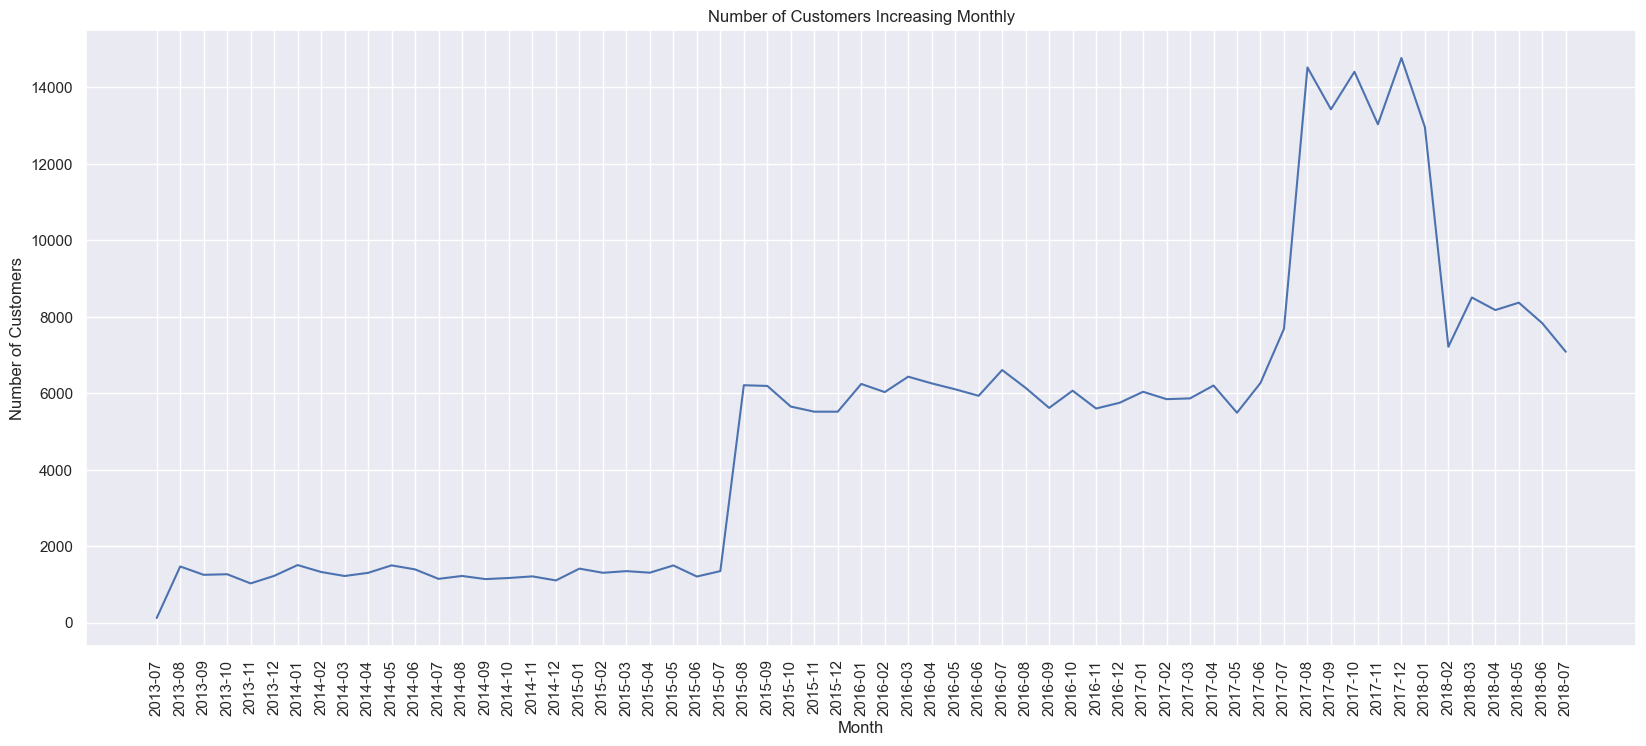

In [92]:
# Group by 'became_member_on_month' and count 'id_x'
customer_counts = profile_have_transcript.groupby('became_member_on_month')['id_x'].count().reset_index()

# Plotting the statistics
sns.set(style="darkgrid")
plt.figure(figsize=(20, 8))
sns.lineplot(data=customer_counts, x='became_member_on_month', y='id_x')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Increasing Monthly')
plt.xticks(rotation=90)
plt.show()

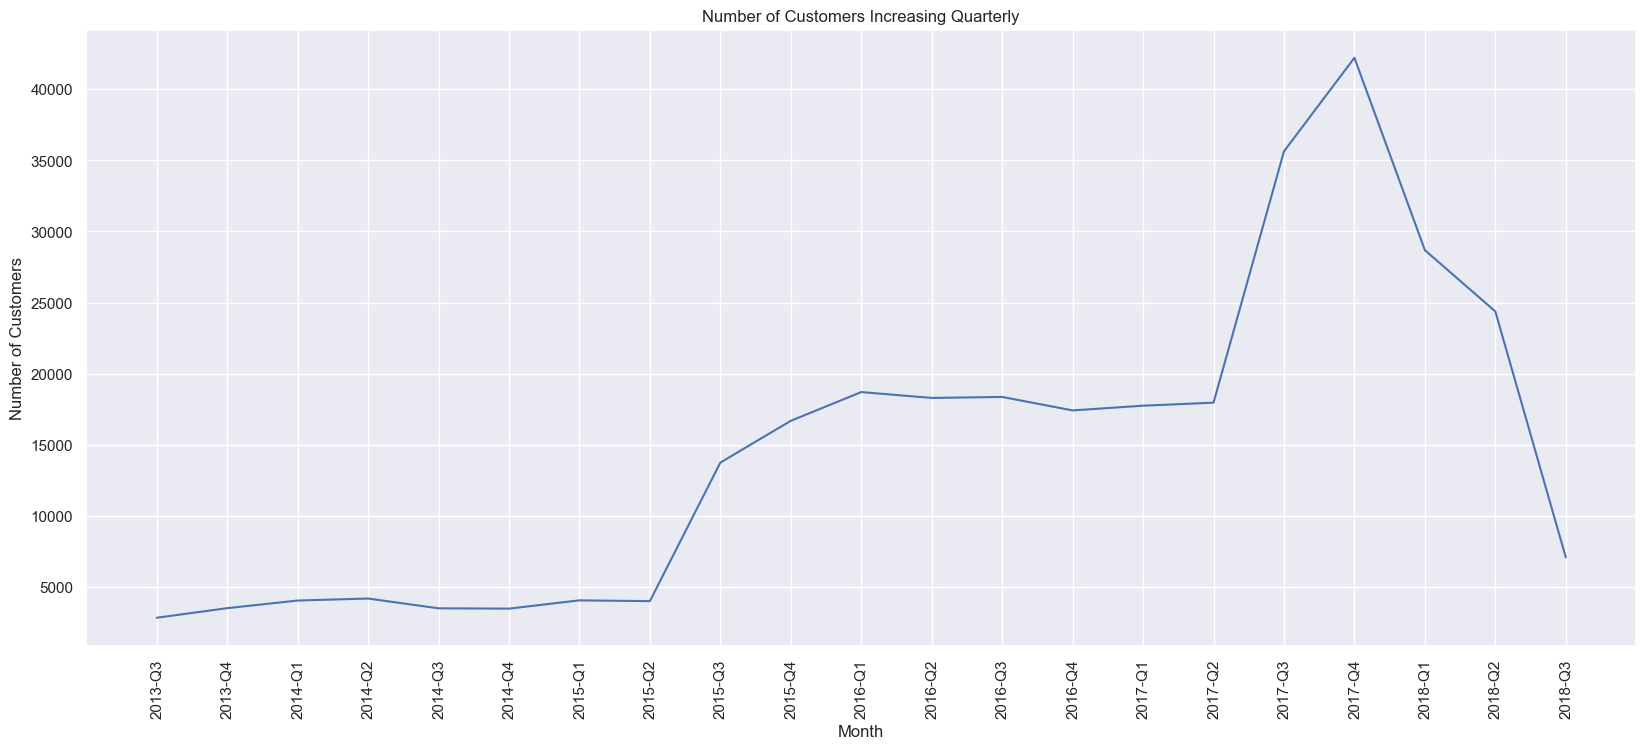

In [93]:
# Group by 'became_member_on_month' and count 'id_x'
customer_counts = profile_have_transcript.groupby('became_member_on_quarter')['id_x'].count().reset_index()

# Plotting the statistics
sns.set(style="darkgrid")
plt.figure(figsize=(20, 8))
sns.lineplot(data=customer_counts, x='became_member_on_quarter', y='id_x')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Increasing Quarterly')
plt.xticks(rotation=90)
plt.show()

**Here is a more detailed version of the user growth numbers obtained from Starbucks. If considered monthly, revenue will almost increase month by month. This is interesting, because when we detect an increase, we will have appropriate incentive policies to keep regular customers. As in the graph, we pay attention to the months June and July every 2 years will be the months with the highest increase in the number of users.**

In [94]:
df_transcript_for_ML = transcript.merge(profile[['id', 'income']], left_on='person', right_on='id', how='left', suffixes=('', '_profile'))
df_transcript_for_ML
# merged_df = merged_df.drop(columns=['id'])
# merged_df = merged_df.rename(columns={'income': 'customer_income'})

,person,event,time,offer_id,amount,reward,types_of_offer,age_group,id,gender,id_profile,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,Elder,78afa995795e4d85b5d9ceeca43f5fef,F,78afa995795e4d85b5d9ceeca43f5fef,100000.000000
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,Elder,a03223e636434f42ac4c3df47e8bac43,Unknown,a03223e636434f42ac4c3df47e8bac43,65404.991568
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,discount,Elder,e2127556f4f64592b11af22de27a7932,M,e2127556f4f64592b11af22de27a7932,70000.000000
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,discount,Elder,8ec6ce2a7e7949b1bf142def7d0e0586,Unknown,8ec6ce2a7e7949b1bf142def7d0e0586,65404.991568
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo,Elder,68617ca6246f4fbc85e91a2a49552598,Unknown,68617ca6246f4fbc85e91a2a49552598,65404.991568
...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,,1,0,Unknown,Elder,b3a1272bc9904337b331bf348c3e8c17,M,b3a1272bc9904337b331bf348c3e8c17,47000.000000
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,,9,0,Unknown,Adult,68213b08d99a4ae1b0dcb72aebd9aa35,M,68213b08d99a4ae1b0dcb72aebd9aa35,62000.000000
306531,a00058cf10334a308c68e7631c529907,transaction,714,,3,0,Unknown,Adult,a00058cf10334a308c68e7631c529907,F,a00058cf10334a308c68e7631c529907,52000.000000
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,,3,0,Unknown,Adult,76ddbd6576844afe811f1a3c0fbb5bec,M,76ddbd6576844afe811f1a3c0fbb5bec,40000.000000


In [95]:
for col in df_transcript_for_ML.columns:
    is_empty_string_present = df_transcript_for_ML[col].apply(lambda x: '' in str(x)).any()
    print(f"{col} contains empty string: {is_empty_string_present}")

person contains empty string: True
event contains empty string: True
time contains empty string: True
offer_id contains empty string: True
amount contains empty string: True
reward contains empty string: True
types_of_offer contains empty string: True
age_group contains empty string: True
id contains empty string: True
gender contains empty string: True
id_profile contains empty string: True
income contains empty string: True


In [96]:
df_transcript_for_ML = df_transcript_for_ML.replace('', 'Unknown')
df_transcript_for_ML = df_transcript_for_ML[df_transcript_for_ML['offer_id'] != 'Unknown']

In [97]:
df_transcript_for_ML

,person,event,time,offer_id,amount,reward,types_of_offer,age_group,id,gender,id_profile,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,bogo,Elder,78afa995795e4d85b5d9ceeca43f5fef,F,78afa995795e4d85b5d9ceeca43f5fef,100000.000000
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,Elder,a03223e636434f42ac4c3df47e8bac43,Unknown,a03223e636434f42ac4c3df47e8bac43,65404.991568
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,discount,Elder,e2127556f4f64592b11af22de27a7932,M,e2127556f4f64592b11af22de27a7932,70000.000000
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,discount,Elder,8ec6ce2a7e7949b1bf142def7d0e0586,Unknown,8ec6ce2a7e7949b1bf142def7d0e0586,65404.991568
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,bogo,Elder,68617ca6246f4fbc85e91a2a49552598,Unknown,68617ca6246f4fbc85e91a2a49552598,65404.991568
...,...,...,...,...,...,...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,714,2298d6c36e964ae4a3e7e9706d1fb8c2,0,3,discount,Elder,a6f84f4e976f44508c358cc9aba6d2b3,Unknown,a6f84f4e976f44508c358cc9aba6d2b3,65404.991568
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,0,2,discount,Elder,b895c57e8cd047a8872ce02aa54759d6,Unknown,b895c57e8cd047a8872ce02aa54759d6,65404.991568
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,discount,Adult,8dda575c2a1d44b9ac8e8b07b93d1f8e,F,8dda575c2a1d44b9ac8e8b07b93d1f8e,64000.000000
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,0,2,discount,Adult,8431c16f8e1d440880db371a68f82dd0,M,8431c16f8e1d440880db371a68f82dd0,39000.000000


## Implementation

### Preprocessing

First thing I need to create map and then change my value to numeric type for machine learning input

In [98]:
def create_map(col_name, df_ml):
    label = df_ml[col_name].astype('category').unique().tolist()
    map = {col_name: {k: v for k, v in zip(label, list(range(1, len(label) + 1)))}}
    return map

map_event = create_map('event', df_transcript_for_ML)
print(map_event)

map_offer_id = create_map('offer_id', df_transcript_for_ML)
print(map_offer_id)

map_types_of_offer = create_map('types_of_offer', df_transcript_for_ML)
print(map_types_of_offer)

map_age_group = create_map('age_group', df_transcript_for_ML)
print(map_age_group)

map_gender = create_map('gender', df_transcript_for_ML)
print(map_gender)



{'event': {'offer received': 1, 'offer viewed': 2, 'offer completed': 3}}
{'offer_id': {'9b98b8c7a33c4b65b9aebfe6a799e6d9': 1, '0b1e1539f2cc45b7b9fa7c272da2e1d7': 2, '2906b810c7d4411798c6938adc9daaa5': 3, 'fafdcd668e3743c1bb461111dcafc2a4': 4, '4d5c57ea9a6940dd891ad53e9dbe8da0': 5, 'f19421c1d4aa40978ebb69ca19b0e20d': 6, '2298d6c36e964ae4a3e7e9706d1fb8c2': 7, '3f207df678b143eea3cee63160fa8bed': 8, 'ae264e3637204a6fb9bb56bc8210ddfd': 9, '5a8bc65990b245e5a138643cd4eb9837': 10}}
{'types_of_offer': {'bogo': 1, 'discount': 2, 'informational': 3}}
{'age_group': {'Elder': 1, 'Adult': 2, 'Young Adult': 3, 'Teenager': 4}}
{'gender': {'F': 1, 'Unknown': 2, 'M': 3, 'O': 4}}


In [99]:
df_transcript_for_ML = df_transcript_for_ML.replace(map_event)
df_transcript_for_ML = df_transcript_for_ML.replace(map_offer_id)
df_transcript_for_ML = df_transcript_for_ML.replace(map_types_of_offer)
df_transcript_for_ML = df_transcript_for_ML.replace(map_age_group)
df_transcript_for_ML = df_transcript_for_ML.replace(map_gender)

In [100]:
df_transcript_for_ML['age_group'].value_counts()

age_group
2        99940
1        62044
3         4929
4          668
Child        0
Name: count, dtype: int64

In [101]:
df_transcript_for_ML.describe()

,event,time,offer_id,amount,reward,types_of_offer,gender,income
count,167581.000000,167581.000000,167581.000000,167581.0,167581.000000,167581.000000,167581.000000,167581.000000
mean,1.745210,353.778412,5.481134,0.0,0.982665,1.728185,2.140571,66301.055142
std,0.768521,198.301287,2.763352,0.0,2.350137,0.713456,0.952580,20259.401992
min,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,30000.000000
25%,1.000000,168.000000,3.000000,0.0,0.000000,1.000000,1.000000,52000.000000
50%,2.000000,408.000000,5.000000,0.0,0.000000,2.000000,3.000000,65404.991568
75%,2.000000,510.000000,8.000000,0.0,0.000000,2.000000,3.000000,78000.000000
max,3.000000,714.000000,10.000000,0.0,10.000000,3.000000,4.000000,120000.000000


In [102]:
mimaxscaler = MinMaxScaler()

df_transcript_for_ML[['time', 'amount', 'reward', 'income']] = mimaxscaler.fit_transform(df_transcript_for_ML[['time', 'amount', 'reward', 'income']])

In [103]:
df_transcript_for_ML

,person,event,time,offer_id,amount,reward,types_of_offer,age_group,id,gender,id_profile,income
0,78afa995795e4d85b5d9ceeca43f5fef,1,0.0,1,0.0,0.0,1,1,78afa995795e4d85b5d9ceeca43f5fef,1,78afa995795e4d85b5d9ceeca43f5fef,0.777778
1,a03223e636434f42ac4c3df47e8bac43,1,0.0,2,0.0,0.0,2,1,a03223e636434f42ac4c3df47e8bac43,2,a03223e636434f42ac4c3df47e8bac43,0.393389
2,e2127556f4f64592b11af22de27a7932,1,0.0,3,0.0,0.0,2,1,e2127556f4f64592b11af22de27a7932,3,e2127556f4f64592b11af22de27a7932,0.444444
3,8ec6ce2a7e7949b1bf142def7d0e0586,1,0.0,4,0.0,0.0,2,1,8ec6ce2a7e7949b1bf142def7d0e0586,2,8ec6ce2a7e7949b1bf142def7d0e0586,0.393389
4,68617ca6246f4fbc85e91a2a49552598,1,0.0,5,0.0,0.0,1,1,68617ca6246f4fbc85e91a2a49552598,2,68617ca6246f4fbc85e91a2a49552598,0.393389
...,...,...,...,...,...,...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,3,1.0,7,0.0,0.3,2,1,a6f84f4e976f44508c358cc9aba6d2b3,2,a6f84f4e976f44508c358cc9aba6d2b3,0.393389
306506,b895c57e8cd047a8872ce02aa54759d6,3,1.0,4,0.0,0.2,2,1,b895c57e8cd047a8872ce02aa54759d6,2,b895c57e8cd047a8872ce02aa54759d6,0.393389
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,2,1.0,2,0.0,0.0,2,2,8dda575c2a1d44b9ac8e8b07b93d1f8e,1,8dda575c2a1d44b9ac8e8b07b93d1f8e,0.377778
306509,8431c16f8e1d440880db371a68f82dd0,3,1.0,4,0.0,0.2,2,2,8431c16f8e1d440880db371a68f82dd0,3,8431c16f8e1d440880db371a68f82dd0,0.100000


In [104]:
target_variable = df_transcript_for_ML['types_of_offer']
df_transcript_for_ML = df_transcript_for_ML.drop(['person', 'id', 'id_profile', 'types_of_offer'], axis=1)
df_transcript_for_ML

,event,time,offer_id,amount,reward,age_group,gender,income
0,1,0.0,1,0.0,0.0,1,1,0.777778
1,1,0.0,2,0.0,0.0,1,2,0.393389
2,1,0.0,3,0.0,0.0,1,3,0.444444
3,1,0.0,4,0.0,0.0,1,2,0.393389
4,1,0.0,5,0.0,0.0,1,2,0.393389
...,...,...,...,...,...,...,...,...
306497,3,1.0,7,0.0,0.3,1,2,0.393389
306506,3,1.0,4,0.0,0.2,1,2,0.393389
306507,2,1.0,2,0.0,0.0,2,1,0.377778
306509,3,1.0,4,0.0,0.2,2,3,0.100000


### Traning

In [105]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(df_transcript_for_ML, target_variable, random_state=0)
print('Train feature + labels shape: ',X_train.shape, y_train.shape,'\nTest feature + labels shape: ', X_test.shape, y_test.shape)

Train feature + labels shape:  (125685, 8) (125685,) 
Test feature + labels shape:  (41896, 8) (41896,)


In [106]:
def calculate_pred_score(model):
    predicted_model = model.predict(X_test)
    # error
    err = abs(predicted_model - y_test)
    # percentage error
    per_err = 100*(err / y_test)
    accu = 100-np.mean(per_err)
    return round(accu, 2)

### Model Evaluation and Validation 

In [107]:
def train_and_print_scores(model, modelname):
    model = model.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train)*100,2)
    pred_acc = calculate_pred_score(model)
    print(f'Accuracy on training set of {modelname}: {acc}%.')
    print(f'Predicting Accuracy of {modelname}: {pred_acc}%')

Random_Forest_Model = RandomForestRegressor(n_estimators=100, random_state=42)
Decision_Tree_Model = DecisionTreeClassifier()
Logistic_Regression_Model = LogisticRegression(max_iter=500)

train_and_print_scores(Random_Forest_Model, "Random Forest")
print('------------------------')
train_and_print_scores(Decision_Tree_Model, "Decision Tree")
print('------------------------')
train_and_print_scores(Logistic_Regression_Model, "Logistic Regression")

Accuracy on training set of Random Forest: 100.0%.
Predicting Accuracy of Random Forest: 100.0%
------------------------
Accuracy on training set of Decision Tree: 100.0%.
Predicting Accuracy of Decision Tree: 100.0%
------------------------
Accuracy on training set of Logistic Regression: 53.0%.
Predicting Accuracy of Logistic Regression: 53.55%


**The results above show that using Random Forest or Decision Tree for this data will cause overfitting (100% accuracy on training set and model). It can be explained that the output of data requires 3 outputs (1: BOGO, 2: discount, 3: informational) while other machine learning algorithms only support less.** 

**So I will choose the results from Logistic Regression for improvement because the results of this machine learning algorithm look the best.**

## Refinement

In [121]:
parameter_grid = dict(solver=['liblinear', 'saga'],dual = [True, False], C=[1.5, 2.0, 3.0], max_iter=[140, 180, 220])

Logistic_Regression_Gridsearch_Model = LogisticRegression(penalty='l2')
Logistic_Regression_Gridsearch_Model = GridSearchCV(estimator=Logistic_Regression_Gridsearch_Model, param_grid=parameter_grid, cv=5, n_jobs=-1)
Logistic_Regression_Gridsearch_Model.fit(X_train, y_train)




c:\Users\tiend\Documents\Virtual Env\dezvirtualenv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
54 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tiend\Documents\Virtual Env\dezvirtualenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tiend\Documents\Virtual Env\dezvirtualenv\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tiend\Documents\Virtual

GridSearchCV(cv=6, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.5, 2.0, 3.0], 'dual': [True, False],
                         'max_iter': [140, 180, 220],
                         'solver': ['liblinear', 'saga']})

In [122]:
print(f'Params after gridsearch: {Logistic_Regression_Gridsearch_Model.best_params_}')
print(f'Score after gridsearch: {Logistic_Regression_Gridsearch_Model.best_score_ * 100}%')


Params after gridsearch: {'C': 3.0, 'dual': True, 'max_iter': 140, 'solver': 'liblinear'}
Score after gridsearch: 54.18546952034398%


**After running Grid search, we obtained results for Logistic Regression that increased by 1.2% compared to before, which is a pretty good result. However, when I want to increase the results even more, we will expand the parameters to apply to grid search like solver or C.**

## Conclusion

### Reflection

To summarize what I have completed and discovered in the project as follows:
> Things completed:
1. I loaded the dataset, checked for anything special hidden in the data, took it out and cleaned the data (filling empty data, not dropping) before putting the data into analysis.
2. Analyze from univariate to multivariate through each data set, including merging data. Use seaborn and plt in parallel to monitor output as a graph.
3. Put the analyzed results into the machine learning model to train using Random Forest, Decision Tree, Logistic Regression. The goal is to build a model that can predict which offers are suitable for which customers.
4. Choose Logistic Regression because it gives better training results than the other two models.
5. Improve the model using GridSearch

> Results received:
1. If considered monthly, revenue will almost increase month by month. This is interesting, because when we detect an increase, we will have appropriate incentive policies to keep regular customers. As in the graph, we pay attention to the months June and July every 2 years will be the months with the highest increase in the number of users.
2. Based on the ratio, I discovered that male customers receive offers and the number of transactions is about **~3%** more than female customers. However, female customers will have a higher offer completion rate than male customers, **~13%**. The type of offer that male customers receive "loses" to female customers is bogo with about ~1%, the rest are similar and not much different.
3. Between transaction data, we get data about offer received. We can see that almost 70-78% of offers will be seen by customers and customers will use 50-55% of those viewed offers. Number of completed promotion for '**bogo**' and '**discount**' doesn't different much.
4. After separated the age to age group and show the statistic on the chart above. I found that almost Starbucks customers came from Adult, and just a small number of Teenager care about those drinks. I think those such low figures are due to the fact that teenagers often do not have enough money to pay for expensive drinks.
5. In terms of gender, completing an offer will not have a big change between the average time when male customers take 381 hours and female customers take 380 hours. But when considering age groups, Teenagers will tend to complete offers faster than other age groups. But it's not much of a difference when the time difference is about 4~10 hours.

Thereby, I think that because female customers tend to favor offers more and they have quite high incomes, focusing on increasing the number of promotions on female customers will probably be the right decision to increase the number of customers. salable goods.

In addition, although it is unknown about the offer completion rate of customers by age group, the statistical time to complete an offer seems to be much higher than the remaining age groups. This is also a business and promotion opportunity.

### Improvement

**I think to improve the results and draw more valid conclusions. Then you need to review the data. Instead of dropping lines with missing data, I replaced those missing areas with mean() and 'Unknown' values, but to be more accurate, I need to find more complete data, find data that doesn't have missing values ​​or is missing a little. . At the same time, we can try some other predictive machine learning models to find the most suitable model for the data. But in the end, more data will improve results.**